In [1]:
import pandas as pd

N = 24
cols = ['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp', 'friends', 'test_time']
col1 = cols[N % 5]
col2 = cols[N**2 % 5 + 5]
print(col1, col2)

data = pd.read_csv('../../datasets/students_simple.csv')
x = data[col1]
y = data[col2]
print(x)
print(y)

pages bmi
0     24
1     32
2     24
3     24
4     60
5     16
6     90
7     24
8     48
9     24
10    16
11    48
12    32
13    48
14    64
15    48
16    90
17    48
18    32
19    60
Name: pages, dtype: int64
0     3.533
1     2.623
2     2.875
3     3.375
4     3.000
5     2.828
6     3.255
7     2.726
8     2.429
9     2.361
10    2.342
11    2.672
12    2.356
13    2.559
14    2.173
15    2.095
16    2.342
17    2.011
18    2.691
19    2.021
Name: bmi, dtype: float64


## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

In [2]:
import numpy as np

def fechner_correlation(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_sign = np.sign(x - x_mean)
    y_sign = np.sign(y - y_mean)
    
    matches = np.sum(x_sign == y_sign)
    mismatches = np.sum(x_sign != y_sign)
    
    K = (matches - mismatches) / n
    
    return K

fechner_coeff = fechner_correlation(x, y)
print(fechner_coeff)

-0.4


In [3]:
import math
import numpy as np
from scipy import stats

def pearson_correlation(x, y):
    n = len(x)
    
    cov = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (n - 1)
    s_x = np.sqrt(np.sum((x - np.mean(x))**2) / (n - 1))
    s_y = np.sqrt(np.sum((y - np.mean(y))**2) / (n - 1))
    
    K = cov / (s_x * s_y)

    return K

def pearson_confidence_interval(r, n, alpha=0.05):
    z = np.arctanh(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)
    lo_z, hi_z = z - z_crit*se, z + z_crit*se
    return np.tanh(lo_z), np.tanh(hi_z)

pearson_coeff = pearson_correlation(x, y)
print(pearson_coeff)

pearson_ci = pearson_confidence_interval(pearson_coeff, len(x))
print(f"Доверительный интервал Пирсона, 95% : ({pearson_ci[0]:.4f}, {pearson_ci[1]:.4f})")


-0.1794973280072121
Доверительный интервал Пирсона, 95% : (-0.5762, 0.2857)


Доверительный интервал Пирсона - это диапазон значений, в котором с заданной вероятностью (95%) находится истинное значение коэффициента корреляции Пирсона. Для построения доверительного интервала используется z-преобразование Фишера

In [4]:
from scipy import stats

def spearman_correlation(x, y):
    n = len(x)
    
    rank_x = stats.rankdata(x)
    rank_y = stats.rankdata(y)

    numer = np.sum((rank_x - np.mean(rank_x)) * (rank_y - np.mean(rank_y)))
    denom_x = np.sqrt(np.sum((rank_x - np.mean(rank_x))**2))
    denom_y = np.sqrt(np.sum((rank_y - np.mean(rank_y))**2))

    K = numer / (denom_x * denom_y)

    return K

spearman_coefficient = spearman_correlation(x, y)
print(spearman_coefficient)

-0.3239399782654808


In [5]:
def kendall_correlation(x, y):
    n = len(x)
    sum = 0
    
    for i in range(n-1):
        for j in range(i+1, n):
            x_order = (x[i] < x[j])
            y_order = (y[i] < y[j])
            
            if x_order != y_order:
                sum += 1
    
    K = 1 - (4 * sum) / (n * (n - 1))
    
    return K

kendall_coefficient = kendall_correlation(x, y)
print(kendall_coefficient)

-0.1473684210526316


Среди рассчитанных коэффициентов корелляции, все принимают значения по модулю ближе к нулю, чем к 1, что может свидетельствовать об отсутствии какой-либо зависимости между выборками.

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

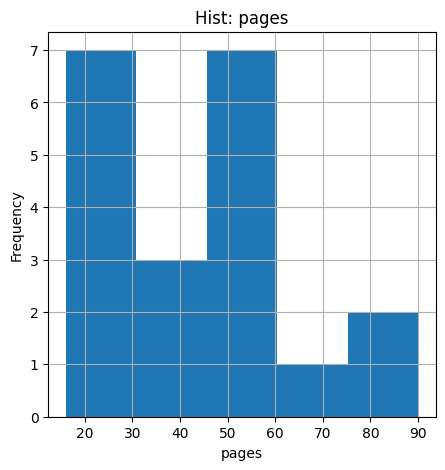

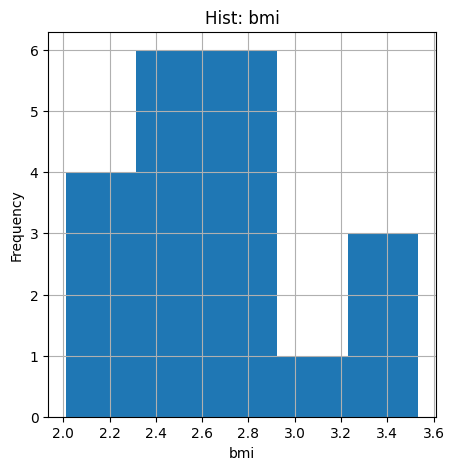

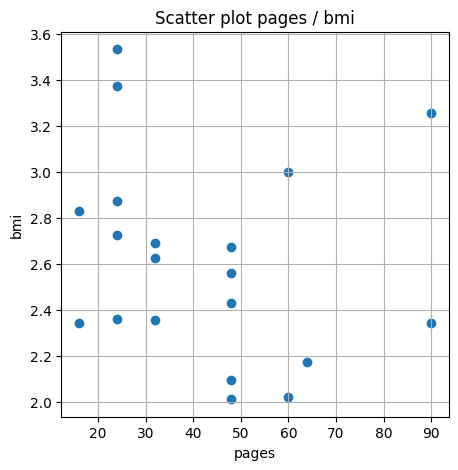

In [6]:
import matplotlib.pyplot as plt

bins = 1 + int(np.log2(len(x)))

plt.figure(figsize=(5, 5))
plt.hist(x, bins)
plt.xlabel(col1)
plt.ylabel('Frequency')
plt.title(f'Hist: {col1}')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(y, bins)
plt.xlabel(col2)
plt.ylabel('Frequency')
plt.title(f'Hist: {col2}')
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter plot {col1} / {col2}')
plt.grid(True)
plt.show()

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

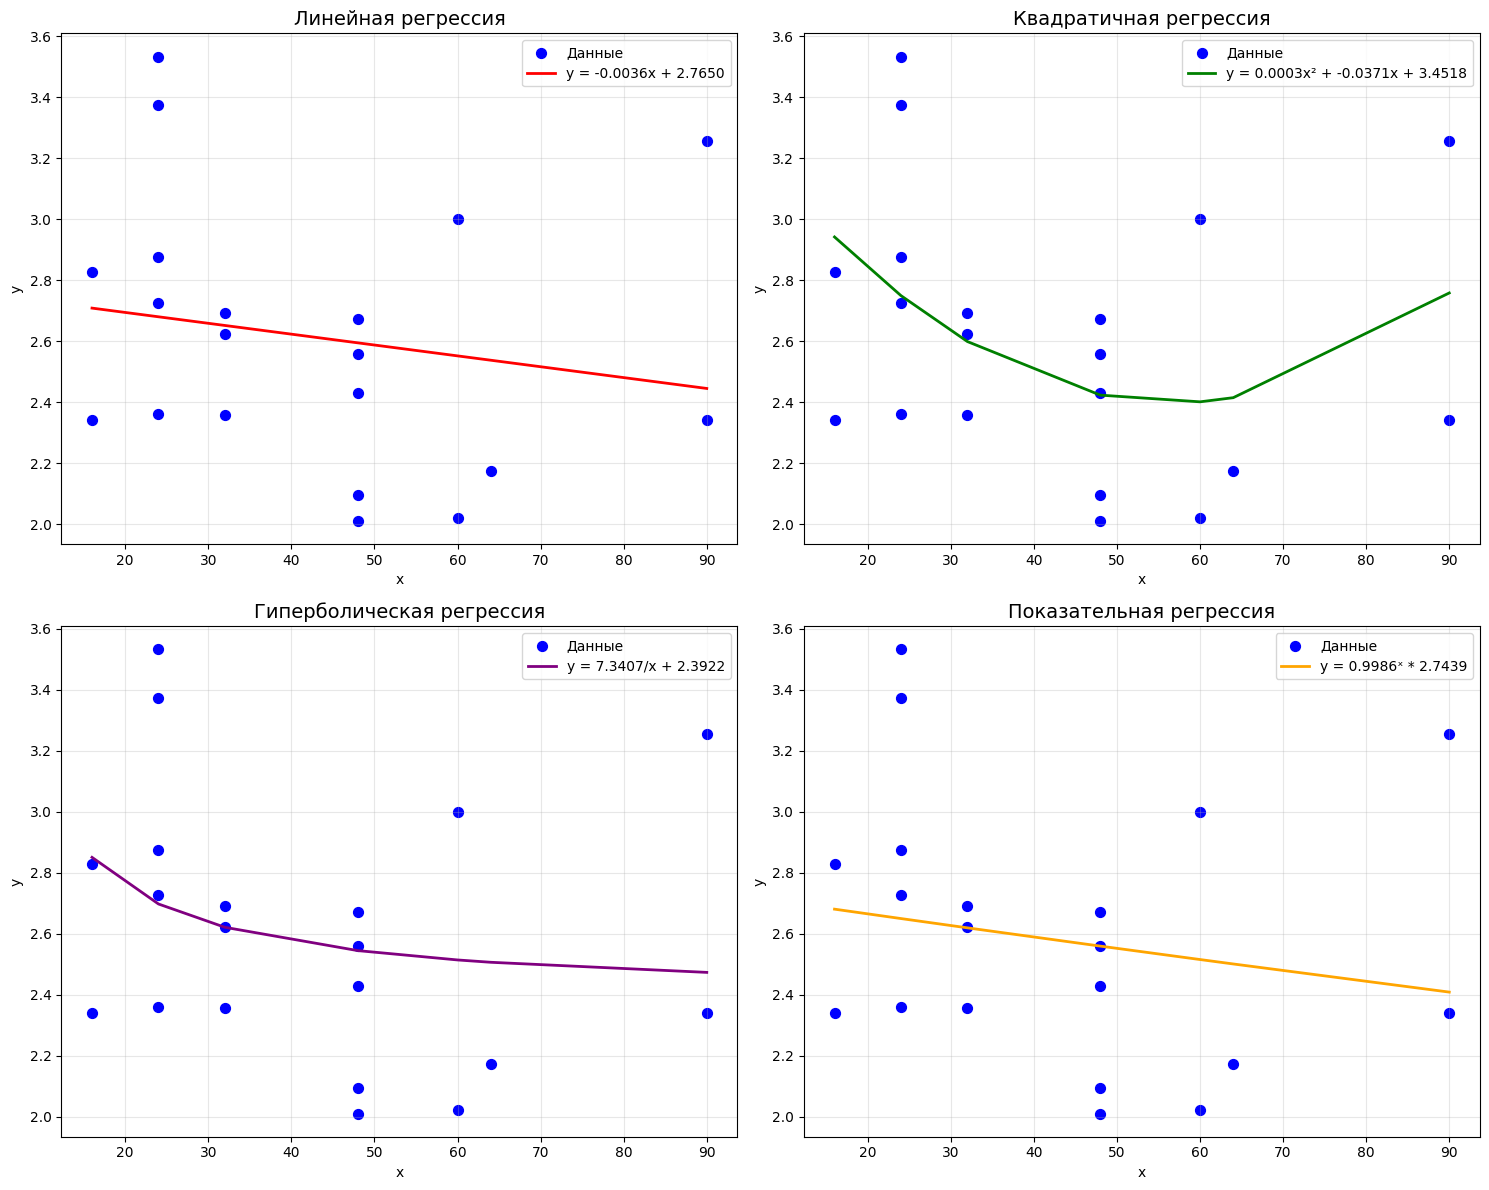

Параметры регрессионных моделей:
Линейная:        y = -0.003561x + 2.765035
Квадратичная:    y = 0.000327x² + -0.037129x + 3.451764
Гиперболическая: y = 7.340669/x + 2.392238
Показательная:   y = 0.998555ˣ * 2.743894


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(x, y):
    A = np.column_stack([x, np.ones(len(x))])
    w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
    return w1, w0

def quadratic_regression(x, y):
    A = np.column_stack([x**2, x, np.ones(len(x))])
    w2, w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
    return w2, w1, w0

def hyperbolic_regression(x, y):
    A = np.column_stack([1 / x, np.ones(len(x))])
    w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
    return w1, w0

def exponential_regression(x, y):
    ln_y = np.log(y)
    A = np.column_stack([x, np.ones(len(x))])
    ln_w1, ln_w0 = np.linalg.lstsq(A, ln_y, rcond=None)[0]
    return np.exp(ln_w1), np.exp(ln_w0)

def calculate_linear_y(x, w1, w0):
    return w1 * x + w0

def calculate_quadratic_y(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

def calculate_hyperbolic_y(x, w1, w0):
    return w1 / x + w0

def calculate_exponential_y(x, w1, w0):
    return w1 ** x * w0

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# 1. Линейная регрессия
w1_lin, w0_lin = linear_regression(x, y)
y_lin = calculate_linear_y(x, w1_lin, w0_lin)

axes[0].scatter(x, y, color='blue', label='Данные', s=50)
axes[0].plot(np.sort(x), calculate_linear_y(np.sort(x), w1_lin, w0_lin), color='red', linewidth=2, label=f'y = {w1_lin:.4f}x + {w0_lin:.4f}')
axes[0].set_title('Линейная регрессия', fontsize=14)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Квадратичная регрессия
w2_quad, w1_quad, w0_quad = quadratic_regression(x, y)
y_quad = calculate_quadratic_y(x, w2_quad, w1_quad, w0_quad)

axes[1].scatter(x, y, color='blue', label='Данные', s=50)
axes[1].plot(np.sort(x), calculate_quadratic_y(np.sort(x), w2_quad, w1_quad, w0_quad), color='green', linewidth=2, 
             label=f'y = {w2_quad:.4f}x² + {w1_quad:.4f}x + {w0_quad:.4f}')
axes[1].set_title('Квадратичная регрессия', fontsize=14)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Гиперболическая регрессия
w1_hyp, w0_hyp = hyperbolic_regression(x, y)
y_hyp = calculate_hyperbolic_y(x, w1_hyp, w0_hyp)

axes[2].scatter(x, y, color='blue', label='Данные', s=50)
axes[2].plot(np.sort(x), calculate_hyperbolic_y(np.sort(x), w1_hyp, w0_hyp), color='purple', linewidth=2, 
             label=f'y = {w1_hyp:.4f}/x + {w0_hyp:.4f}')
axes[2].set_title('Гиперболическая регрессия', fontsize=14)
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Показательная регрессия
w1_exp, w0_exp = exponential_regression(x, y)
y_exp = calculate_exponential_y(x, w1_exp, w0_exp)

axes[3].scatter(x, y, color='blue', label='Данные', s=50)
axes[3].plot(np.sort(x), calculate_exponential_y(np.sort(x), w1_exp, w0_exp), color='orange', linewidth=2, 
             label=f'y = {w1_exp:.4f}ˣ * {w0_exp:.4f}')
axes[3].set_title('Показательная регрессия', fontsize=14)
axes[3].set_xlabel('x')
axes[3].set_ylabel('y')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Параметры регрессионных моделей:")
print("=" * 50)
print(f"Линейная:        y = {w1_lin:.6f}x + {w0_lin:.6f}")
print(f"Квадратичная:    y = {w2_quad:.6f}x² + {w1_quad:.6f}x + {w0_quad:.6f}")
print(f"Гиперболическая: y = {w1_hyp:.6f}/x + {w0_hyp:.6f}")
print(f"Показательная:   y = {w1_exp:.6f}ˣ * {w0_exp:.6f}")

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данным с помощью критерия Фишера


Визуально трудно сказать, какая регрессионная модель наиболее хорошо описывает связь между выборками, поэтому расчеты будут для всех моделей.

In [8]:
def f_test_regression(y, y_pred, k, alpha=0.05):
    n = len(y)

    numer = np.sum((y - y_pred)**2)
    denom = np.sum((y - np.mean(y))**2)
    
    R_squared = 1 - numer / denom
    print(f"R_squared: {R_squared}")
    df_numerator = k - 1
    df_denominator = n - k

    F_stat = (R_squared / (1 - R_squared)) * (df_denominator / df_numerator)
    
    F_critical = stats.f.ppf(1 - alpha, df_numerator, df_denominator)
    
    reject_H0 = F_stat > F_critical
    
    if reject_H0:
        print("РЕЗУЛЬТАТ: Отвергаем H0")
        print(f"F_crit: {F_critical}, F_stat: {F_stat}")
        print("Уравнение регрессии СТАТИСТИЧЕСКИ ЗНАЧИМО")
        print("Модель лучше предсказывает, чем простое среднее")
    else:
        print("РЕЗУЛЬТАТ: Не отвергаем H0")
        print(f"F_crit: {F_critical}, F_stat: {F_stat}")
        print("Уравнение регрессии НЕ ЗНАЧИМО")
        print("Модель не улучшает предсказание по сравнению со средним")
    print()

f_test_regression(y, y_lin, 2)
f_test_regression(y, y_quad, 3)
f_test_regression(y, y_hyp, 2)
f_test_regression(y, y_exp, 2)


R_squared: 0.0322192907617288
РЕЗУЛЬТАТ: Не отвергаем H0
F_crit: 4.413873419170567, F_stat: 0.5992547982978377
Уравнение регрессии НЕ ЗНАЧИМО
Модель не улучшает предсказание по сравнению со средним

R_squared: 0.18297853494685412
РЕЗУЛЬТАТ: Не отвергаем H0
F_crit: 3.5915305684750827, F_stat: 1.903643433587255
Уравнение регрессии НЕ ЗНАЧИМО
Модель не улучшает предсказание по сравнению со средним

R_squared: 0.06699175399187796
РЕЗУЛЬТАТ: Не отвергаем H0
F_crit: 4.413873419170567, F_stat: 1.2924339918891843
Уравнение регрессии НЕ ЗНАЧИМО
Модель не улучшает предсказание по сравнению со средним

R_squared: 0.02890608667307537
РЕЗУЛЬТАТ: Не отвергаем H0
F_crit: 4.413873419170567, F_stat: 0.535797365192826
Уравнение регрессии НЕ ЗНАЧИМО
Модель не улучшает предсказание по сравнению со средним



Все 4 модели получили коэффициент детерминации близкий к 0, т.е. построенная модель объясняет лишь малую часть дисперсии зависимой переменной и не улучшает предсказание по сравнению с простым средним.